# Save the forest

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.interactive(False)

pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
inputdir = 'G://Kaggle Amazon Forest/'

print('# File sizes')
for file in os.listdir(inputdir):
    if not os.path.isdir(inputdir + file):
        print(file.ljust(30) + str(round(os.path.getsize(inputdir + file) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize(inputdir + file + '/' + x)/1000000 for x in os.listdir('G://Kaggle Amazon Forest/' + file)]
        print(file.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
        
df_train = pd.read_csv(inputdir + 'train.csv')
df_train.head()

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

# File sizes
Kaggle-planet-test-tif        20883.99MB
Kaggle-planet-train-tif       13815.6MB
sample_submission.csv         1.94MB
test-jpg                      637.8MB (40669 files)
test-jpg-additional           321.08MB (20522 files)
train-jpg                     634.68MB (40479 files)
train.csv                     1.43MB
__MACOSX                      0.0MB (3 files)


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [2]:
plt.interactive(False)
labels = df_train['tags'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1

data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-label-dist')
plt.show()

<div id="d3e77bf9-63be-43f1-a9fa-0632a4db965a" style="height: 525px; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">require(["plotly"], function(Plotly) { window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("d3e77bf9-63be-43f1-a9fa-0632a4db965a", [{"type": "bar", "x": ["haze", "primary", "agriculture", "clear", "water", "habitation", "road", "cultivation", "slash_burn", "cloudy", "partly_cloudy", "conventional_mine", "bare_ground", "artisinal_mine", "blooming", "selective_logging", "blow_down"], "y": [2695, 37840, 12338, 28203, 7262, 3662, 8076, 4547, 209, 2330, 7251, 100, 859, 339, 332, 340, 101]}], {}, {"showLink": true, "linkText": "Export to plot.ly"})});</script>

In [ ]:
# Co-occurence Matrix
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0
        cy = 0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = cy / c

data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()))]
layout=go.Layout(height=800, width=800, title='Co-occurence matrix of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-com')

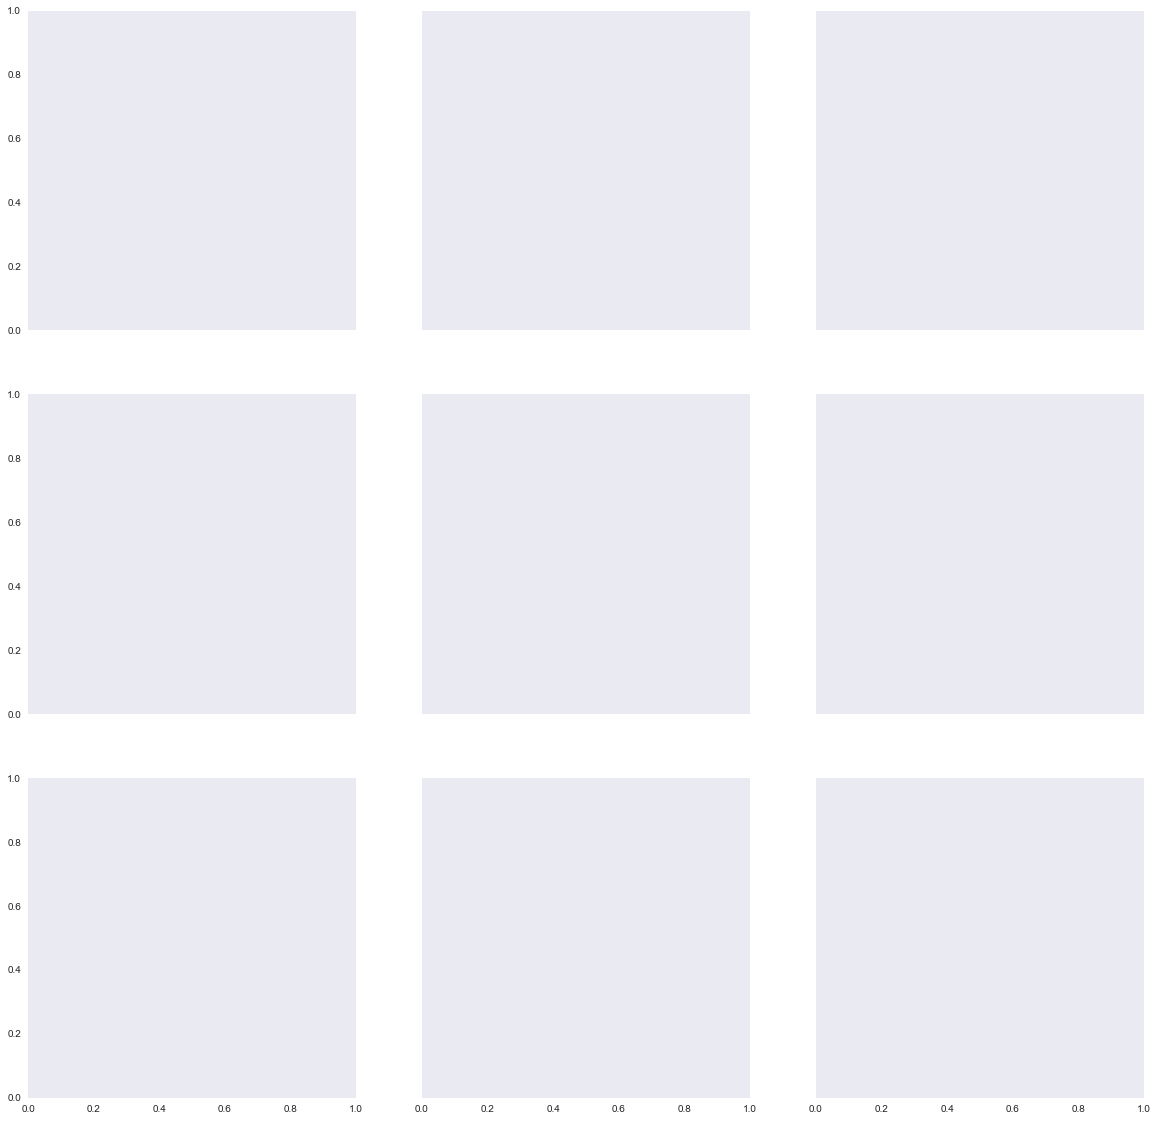

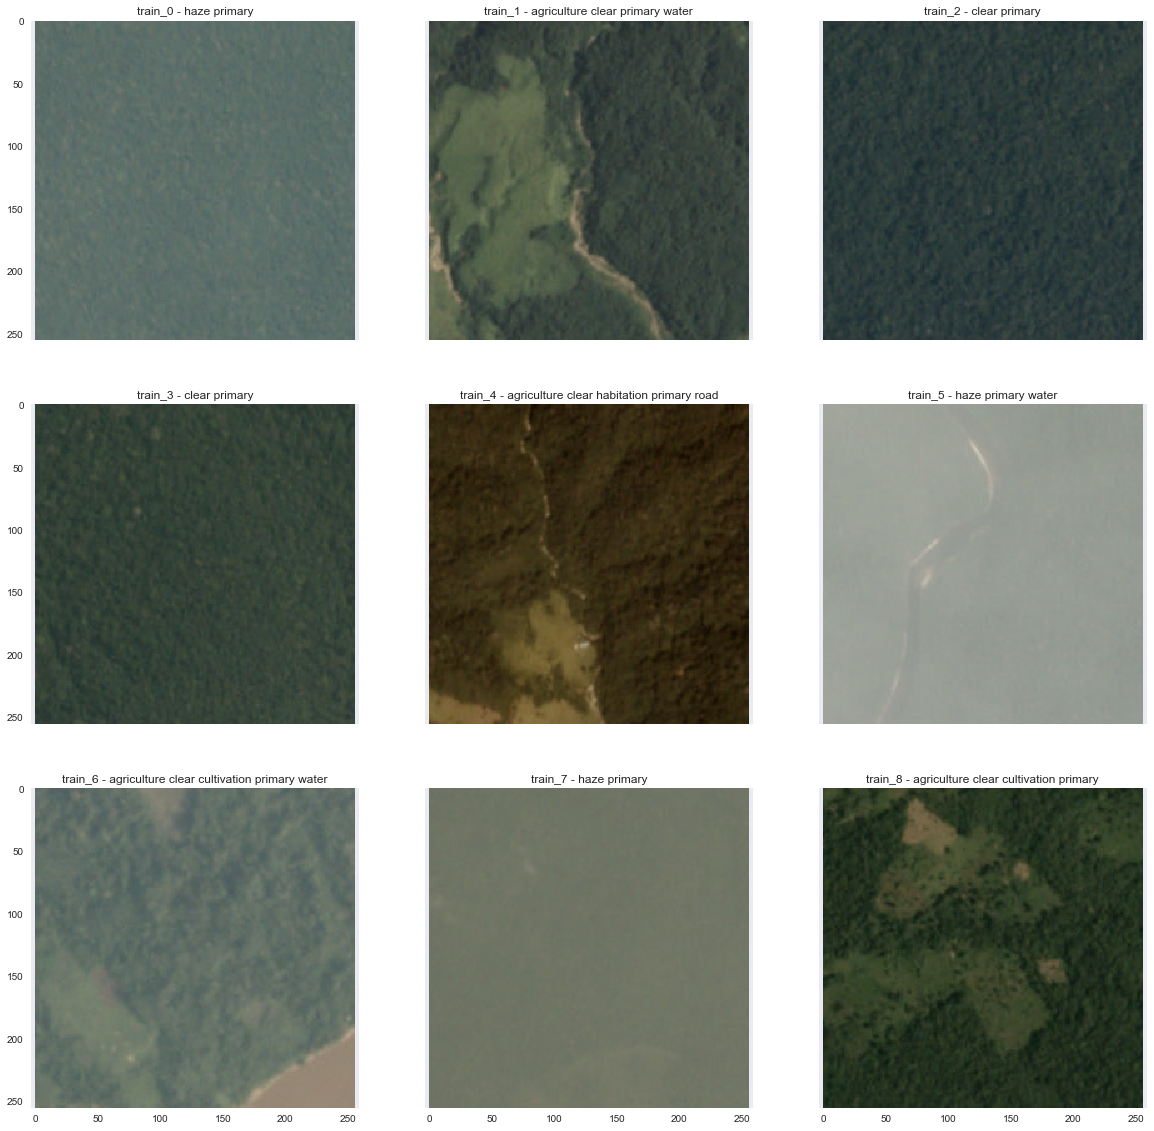

In [12]:
import cv2

new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0
for f, l in df_train[:9].values:
    img = cv2.imread('G://Kaggle Amazon Forest/train-jpg/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
    #ax[i // 4, i % 4].show()
    i += 1
    
plt.show()